In [ ]:
%load_ext autoreload
%autoreload 2
# from ipython import autoreload
import numpy as np
import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import causallearn
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.search.ConstraintBased.FCI import fci
import random

from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.algorithms.ClusterFCI import ClusterFCI
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder
from clustercausal.utils.Utils import *
from clustercausal.experiments.Simulator import Simulator

c:\Users\ga87val\00_PhD\CodeDevelopment\CDAG_discovery\clustercausal\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
INFO: cffi mode is CFFI_MODE.ANY
INFO: R home found: C:\Program Files\R\R-4.3.3
INFO: Default options to initialize R: rpy2, --quiet, --no-save


In [510]:
# # cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2' : ['X3', 'X4'], 'C3' : ['X5', 'X6']}, \
# #                          cluster_edges = [('C1', 'C2'), ('C2', 'C3')], \
# #                          cluster_bidirected_edges=[('C2', 'C3')])
# cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2' : ['X3', 'X4'], 'C3' : ['X5', 'X6'], 'C4' : ['X7', 'X8']}, \
#                          cluster_edges = [('C1', 'C2'), ('C2', 'C3'), ('C1', 'C4')], \
#                          cluster_bidirected_edges=[('C2', 'C3'), ('C3', 'C4')])
# # cluster_dag.cluster_graph.draw_pydot_graph()

In [511]:
simulation = Simulator(n_nodes = 4, n_edges = 3, n_clusters = 2, seed = 232)
cluster_dag = simulation.run_with_latents(no_of_latent_vars=2)

INFO: Finished synthetic dataset


{'X2': [['X2'], ['X2', 'X4']], 'X3': [['X3']], 'X4': [['X4'], ['X4', 'X2']], 'X6': [['X6']]}
{'X2': [['X2'], ['X2', 'X4'], ['X4', 'X2'], ['X6', 'X2'], ['X6', 'X2', 'X4'], ['X2', 'X4', 'X3'], ['X2', 'X4', 'X6']], 'X3': [['X3'], ['X4', 'X3'], ['X3', 'X6']], 'X4': [['X4'], ['X4', 'X2'], ['X4', 'X2'], ['X4', 'X3'], ['X4', 'X6']], 'X6': [['X6'], ['X3', 'X6'], ['X4', 'X6'], ['X6', 'X2']]}
Inducing path found: ['X6', 'X2', 'X4']
Inducing path found: ['X2', 'X4', 'X3']
Inducing path found: ['X2', 'X4', 'X6']


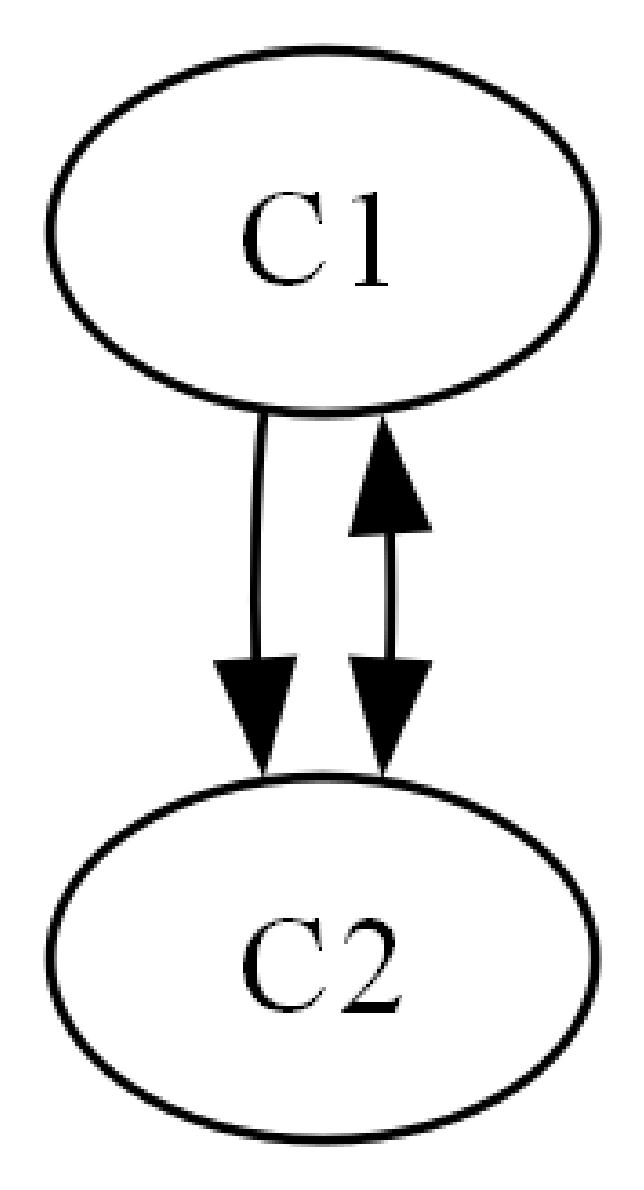

In [512]:
cluster_dag.cluster_graph.draw_pydot_graph()

In [513]:
cluster_dag.cluster_mapping

{'C1': ['X4', 'X3', 'X6'], 'C2': ['X2']}

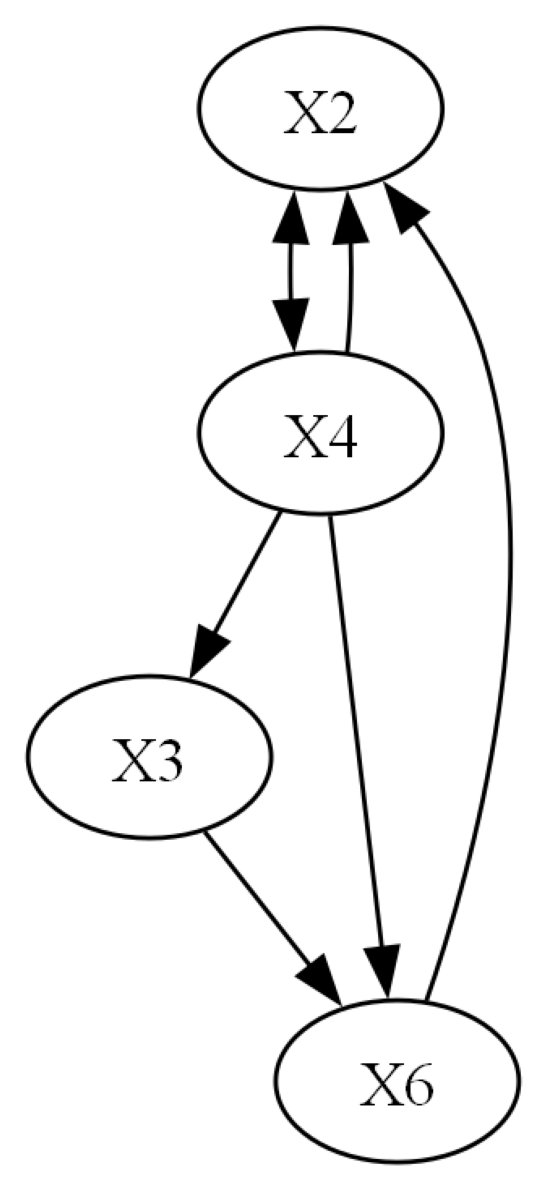

In [514]:
cluster_dag.true_dag.draw_pydot_graph()

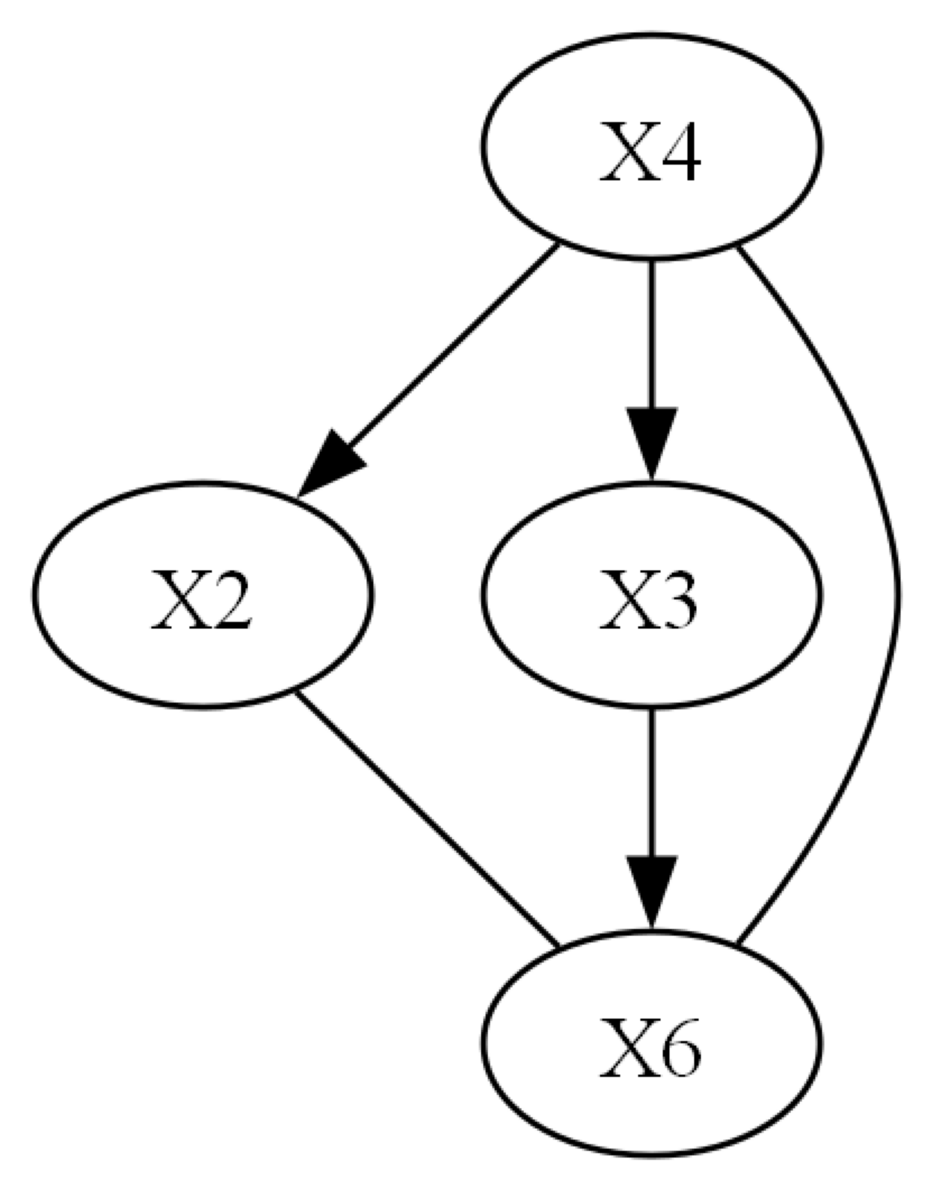

In [515]:
cluster_dag.true_mag.draw_pydot_graph()

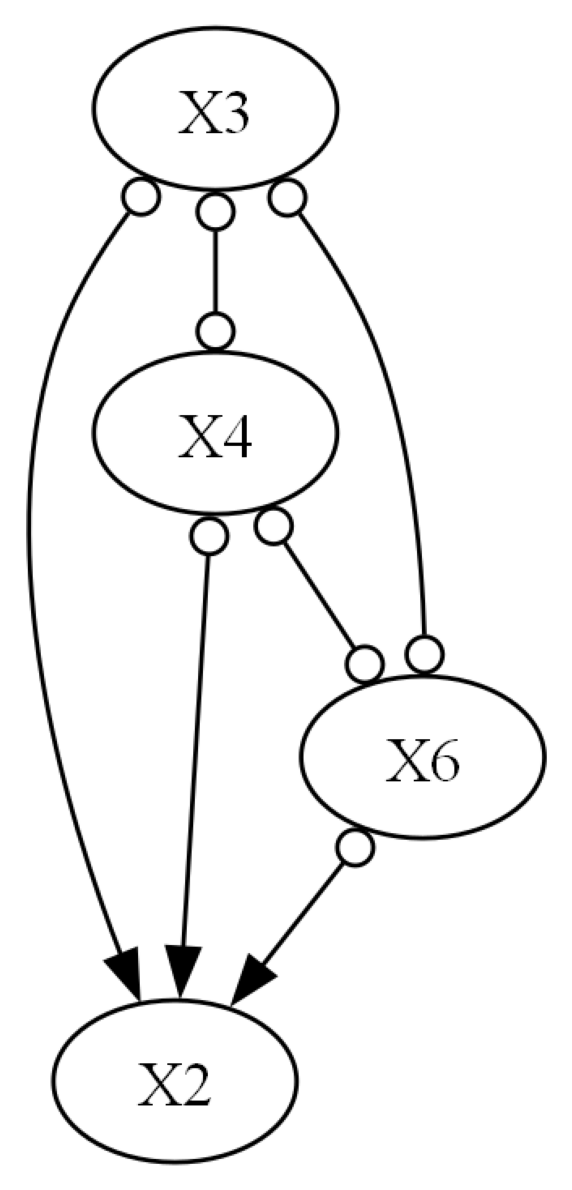

In [516]:
cluster_dag.cdag_to_circle_mpdag()
cluster_dag.cg.draw_pydot_graph()

In [517]:
dic = {'X1': [0], 'X2': [1], 'X3': [2], 'X4': [3], 'X5': [4], 'X6': [5], 'X7': [6], 'X8': [7], 'X9': [8]}
dic['X1'].append(dic['X1'] + [1])

In [518]:
dic

{'X1': [0, [0, 1]],
 'X2': [1],
 'X3': [2],
 'X4': [3],
 'X5': [4],
 'X6': [5],
 'X7': [6],
 'X8': [7],
 'X9': [8]}

In [519]:
[1,2,3][1:-1]

[2]

In [520]:
[1,2,3][-1]

3